__Importing required modules__

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

__Loading the dataset__

In [5]:
nobel=pd.read_csv('nobel.csv')

__Displaying first five rows of the dataset__

In [6]:
nobel.head()

,Year,Category,Prize,Motivation,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,01-03-11,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,07-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,31-03-17,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,30-10-10,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,12-06-12,Paris,France


__Total number of entries in the dataset__

In [7]:
print(len(nobel))

969


__Information and statistics about the dataset__

In [8]:
nobel.describe()

,Year,Laureate ID
count,969.000000,969.000000
mean,1970.287926,470.152735
std,32.937498,274.586623
min,1901.000000,1.000000
25%,1947.000000,230.000000
50%,1976.000000,462.000000
75%,1999.000000,718.000000
max,2016.000000,937.000000


In [9]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Laureate ID           969 non-null    int64 
 5   Laureate Type         969 non-null    object
 6   Full Name             969 non-null    object
 7   Birth Date            940 non-null    object
 8   Birth City            941 non-null    object
 9   Birth Country         943 non-null    object
 10  Sex                   943 non-null    object
 11  Organization Name     722 non-null    object
 12  Organization City     716 non-null    object
 13  Organization Country  716 non-null    object
 14  Death Date            617 non-null    object
 15  Death City            599 non-null    ob

__Number of unique categories in which prize is awarded__

In [10]:
nobel['Category'].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

__Count of number of prizes awarded in a category__

In [11]:
count=pd.DataFrame(nobel['Category'].value_counts())
count

,Category
Medicine,227
Physics,222
Chemistry,194
Peace,130
Literature,113
Economics,83


__Plotting the above information__

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Categories')]

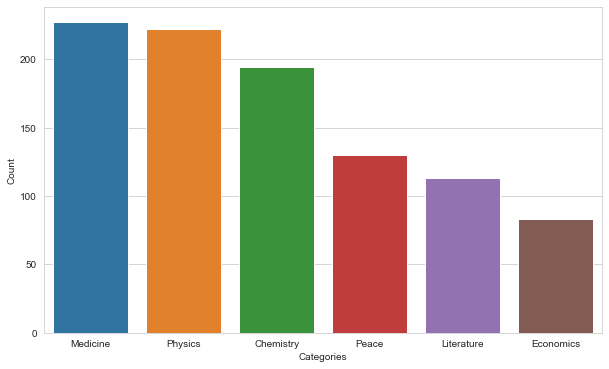

In [16]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
g=sns.barplot(x=count.index,y='Category',data=count)
g.set(xlabel='Categories',ylabel='Count')

_Most of the prizes are won in the category Medicine_

__Comparison between number of prizes won by male and female recipients__

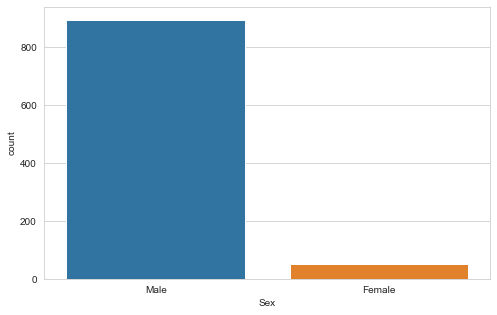

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(nobel['Sex'])

_As evident from the above visualisation, women have been awarded very few prizes as compared to men_

__Lets see how the proportion of female winners per decade has changed__

In [19]:
nobel['female_winner'] = nobel['Sex']=='Female'
nobel['decade'] = (np.floor(nobel['Year']/10)*10).astype(int)
prop_female_winners = nobel.groupby('decade',as_index=False)['female_winner'].count()

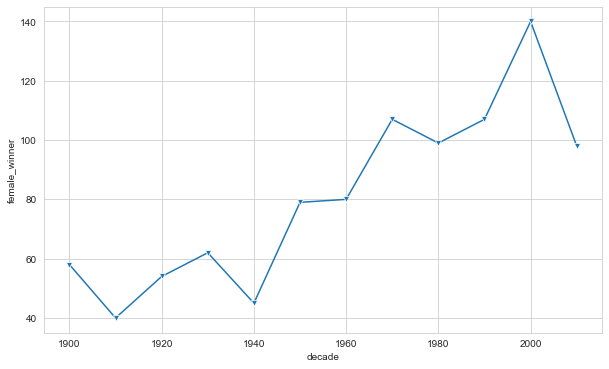

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x='decade',y='female_winner',data=prop_female_winners,marker='v')

__Display the number of prizes won by each country__

In [21]:
data=nobel['Birth Country'].value_counts().head(10)
data1=pd.DataFrame(data)
data1

,Birth Country
United States of America,276
United Kingdom,88
Germany,70
France,53
Sweden,30
Japan,29
Russia,20
Netherlands,19
Canada,18
Italy,18


_USA stands dominant yet again, bagging highest number of prizes till date_

 __Calculating the proportion of USA born winners per decade__

In [22]:
nobel['usa_born_winner']=nobel['Birth Country']=='United States of America'
#nobel['decade'] = (np.floor(nobel['Year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade',as_index=False)['usa_born_winner'].mean()

__Lets visualise USA's dominance over time in the form of a line chart__

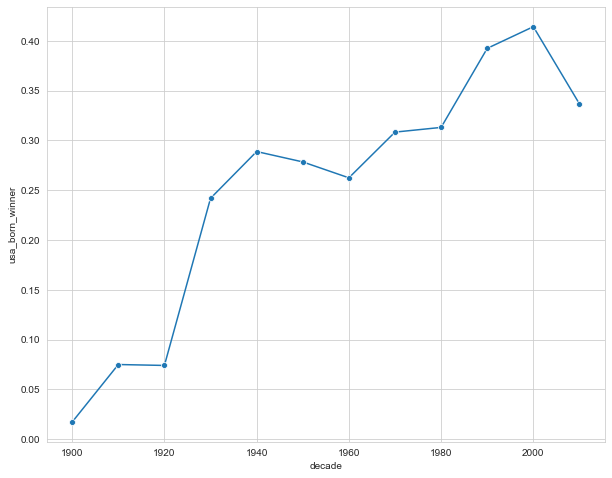

In [23]:
plt.figure(figsize=(10,8))
sns.lineplot(x='decade',y='usa_born_winner',data=prop_usa_winners,marker='o')

__Percentage of prizes won by top 10 countries__

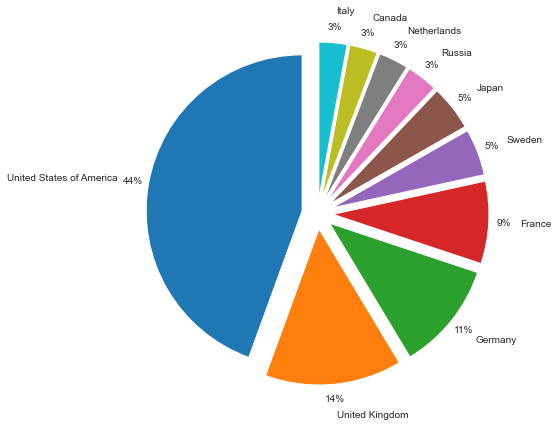

In [24]:
plt.figure(figsize=(15,6))
plt.pie(data1['Birth Country'],labels=data.index,explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1),
         startangle=90,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.tight_layout()

__Laureates who have won more than 1 prize__

In [25]:
nobel.groupby('Full Name').filter(lambda x:len(x)>1).groupby('Full Name')['Prize'].count()

Full Name
Abdus Salam                         2
Adam G. Riess                       2
Adolf Friedrich Johann Butenandt    2
Albert Fert                         2
Alvin E. Roth                       2
                                   ..
Tomas Lindahl                       2
Toshihide Maskawa                   2
Walther Bothe                       2
Werner Forssmann                    2
William Parry Murphy                2
Name: Prize, Length: 63, dtype: int64

__Visualisation of prize distribution with decades for countries- USA, United Kingdom, India, China ( Selected 2 countries with large number of prizes and 2 with lesser number of prizes)__

In [26]:
nobel['india_born_winner']=nobel['Birth Country']=='India'
nobel['decade'] = (np.floor(nobel['Year']/10)*10).astype(int)
prop_india_winners = nobel.groupby('decade',as_index=False)['india_born_winner'].mean()

In [27]:
nobel['UK_born_winner']=nobel['Birth Country']=='United Kingdom'
nobel['decade'] = (np.floor(nobel['Year']/10)*10).astype(int)
prop_UK_winners = nobel.groupby('decade',as_index=False)['UK_born_winner'].mean()

In [28]:
nobel['China_born_winner']=nobel['Birth Country']=='China'
nobel['decade'] = (np.floor(nobel['Year']/10)*10).astype(int)
prop_China_winners = nobel.groupby('decade',as_index=False)['China_born_winner'].mean()

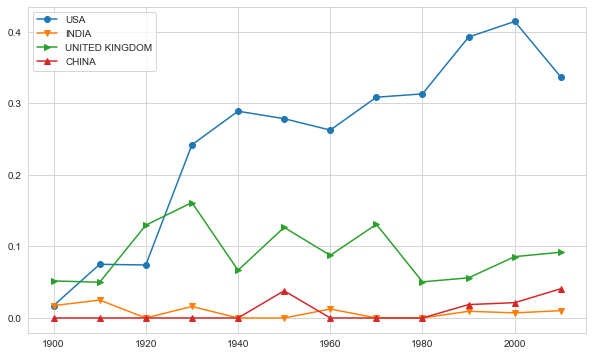

In [29]:
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(prop_usa_winners['decade'],prop_usa_winners['usa_born_winner'],label='USA',marker='o')
ax.plot(prop_india_winners['decade'],prop_india_winners['india_born_winner'],label='INDIA',marker='v')
ax.plot(prop_UK_winners['decade'],prop_UK_winners['UK_born_winner'],label='UNITED KINGDOM',marker='>')
ax.plot(prop_China_winners['decade'],prop_China_winners['China_born_winner'],label='CHINA',marker='^')
plt.legend()